In [1]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
from arch import arch_model
import sys
import os
# Add the 'src' folder to the path
sys.path.append(os.path.abspath('../src'))
from utils.preprocessing import load_and_prepare
from utils.risk_models.analyze_residuals import analyze_residuals
from utils.risk_models.compare_garch_models import compare_garch_models
from utils.risk_models.forecast_volatility import forecast_volatility
from utils.risk_models import volatility_regime_analysis
from utils.risk_models.cross_asset_volatility_analysis import cross_asset_volatility_analysis
from utils.risk_models import calculate_risk_metrics


In [2]:
# load data


aapl = load_and_prepare('../data/AAPL.csv')
btc = load_and_prepare('../data/BTC-USD.csv')
gspc = load_and_prepare('../data/GSPC.csv')
eth = load_and_prepare('../data/ETH.csv')

# Store in a dictionary for easy group operations
assets = {
    'AAPL': aapl,
    'BTC-USD': btc, 
    'GSPC': gspc,
    'ETH': eth
}

In [3]:
# Data struvtire for the assets
print("Dataset Analysis:")
print("-" * 50)

for name, df in assets.items():
    print(f"\nAsset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Index type: {type(df.index)}")
    print(f"First few rows:")
    print(df.head(3))
    print("-" * 30)

Dataset Analysis:
--------------------------------------------------

Asset: AAPL
Shape: (2614, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                price  log_return
Date                             
2015-01-05  23.604324   -0.028577
2015-01-06  23.606562    0.000095
2015-01-07  23.937572    0.013925
------------------------------

Asset: BTC-USD
Shape: (3811, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                 price  log_return
Date                              
2015-01-02  315.032013    0.002489
2015-01-03  281.082001   -0.114028
2015-01-04  264.195007   -0.061959
------------------------------

Asset: GSPC
Shape: (2622, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                  price  log_return
Date                               
2015-01-05  20

Starting Advanced GARCH Analysis...

==================== ADVANCED ANALYSIS FOR AAPL ====================



1. RESIDUAL ANALYSIS


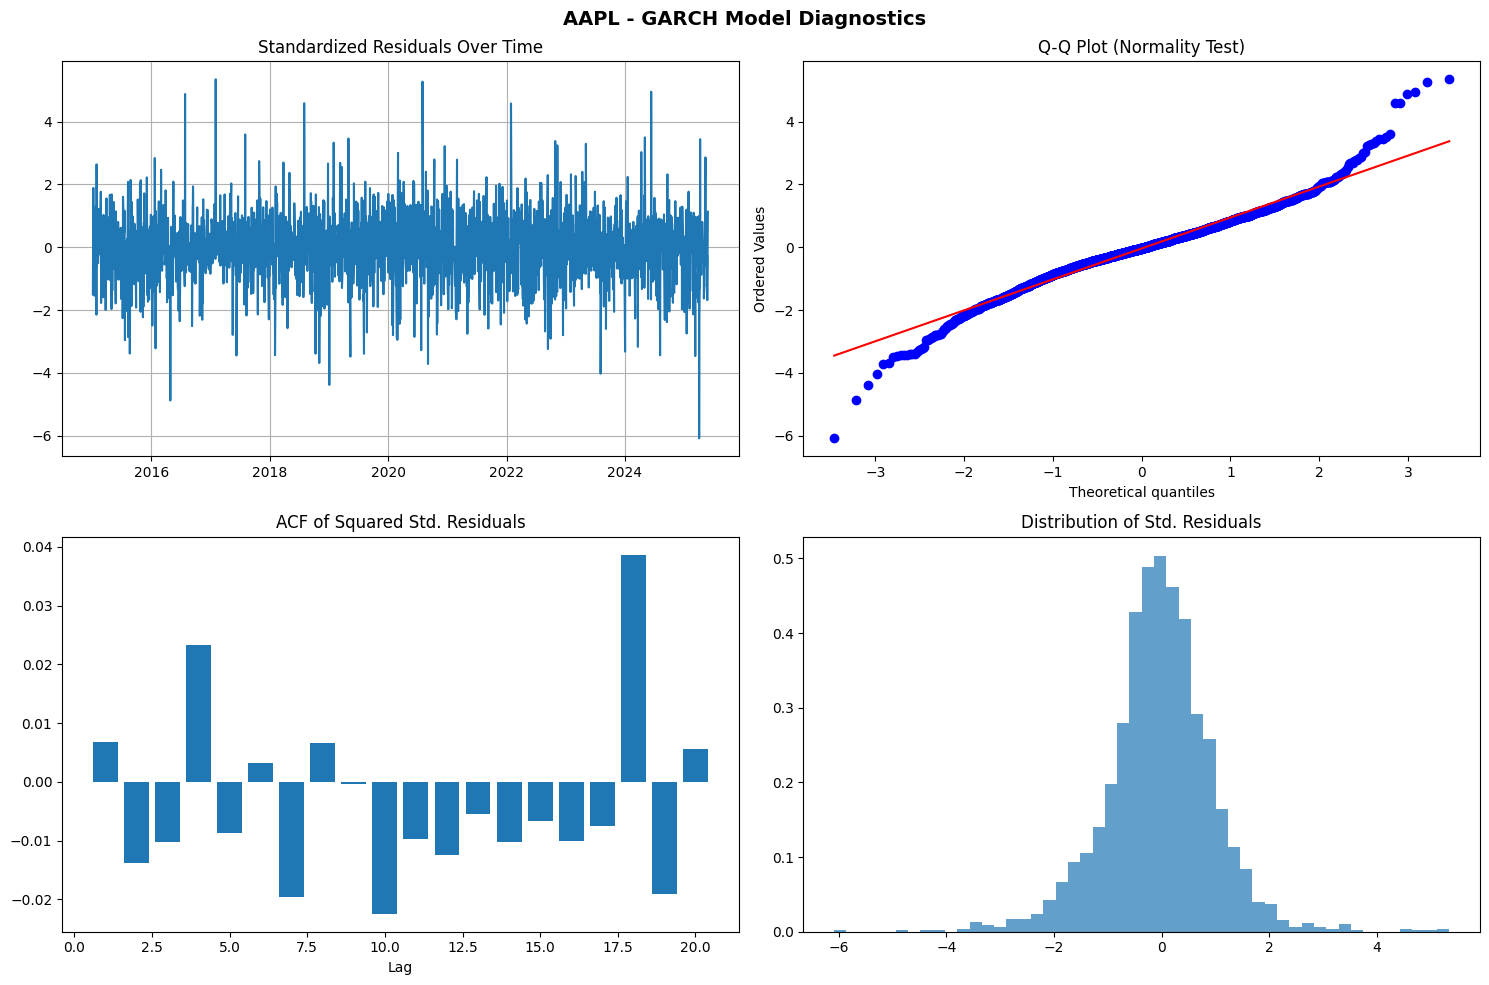


AAPL - Ljung-Box Test (p-values < 0.05 indicate remaining autocorrelation):
1    0.728625
2    0.734609
3    0.828354
4    0.678914
5    0.775720
Name: lb_pvalue, dtype: float64

2. MODEL COMPARISON

AAPL - Model Comparison:
                         AIC           BIC  Log-Likelihood
GJR-GARCH(1,1)  10004.450285  10033.793469    -4997.225142
GARCH(1,1)      10072.002736  10095.477284    -5032.001368
GARCH(1,2)      10073.185314  10102.528499    -5031.592657
GARCH(2,1)      10074.002736  10103.345920    -5032.001368
EGARCH(1,1)     10075.024324  10098.498872    -5033.512162

3. VOLATILITY FORECASTING


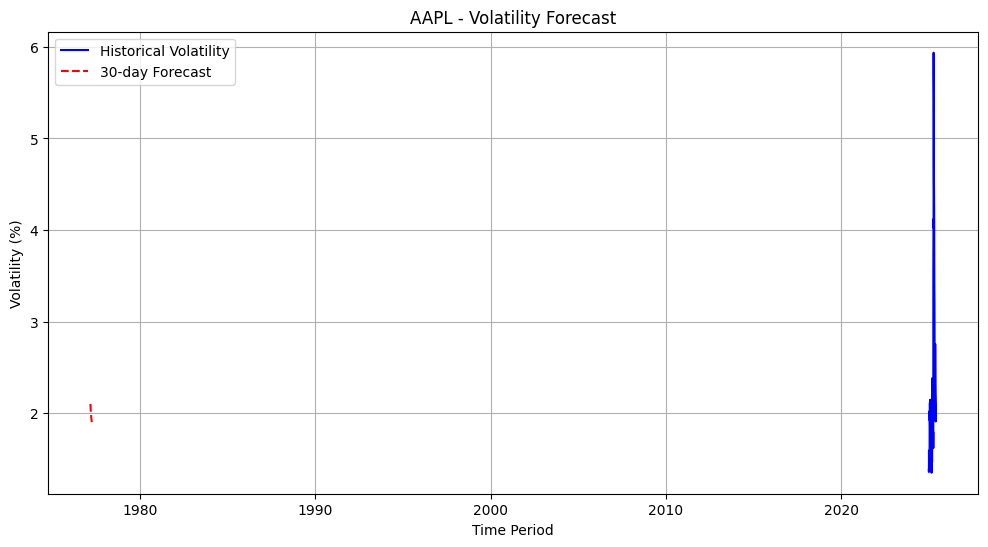


4. RISK METRICS
Analysis failed for AAPL: 'module' object is not callable

==================== ADVANCED ANALYSIS FOR BTC-USD ====================

1. RESIDUAL ANALYSIS


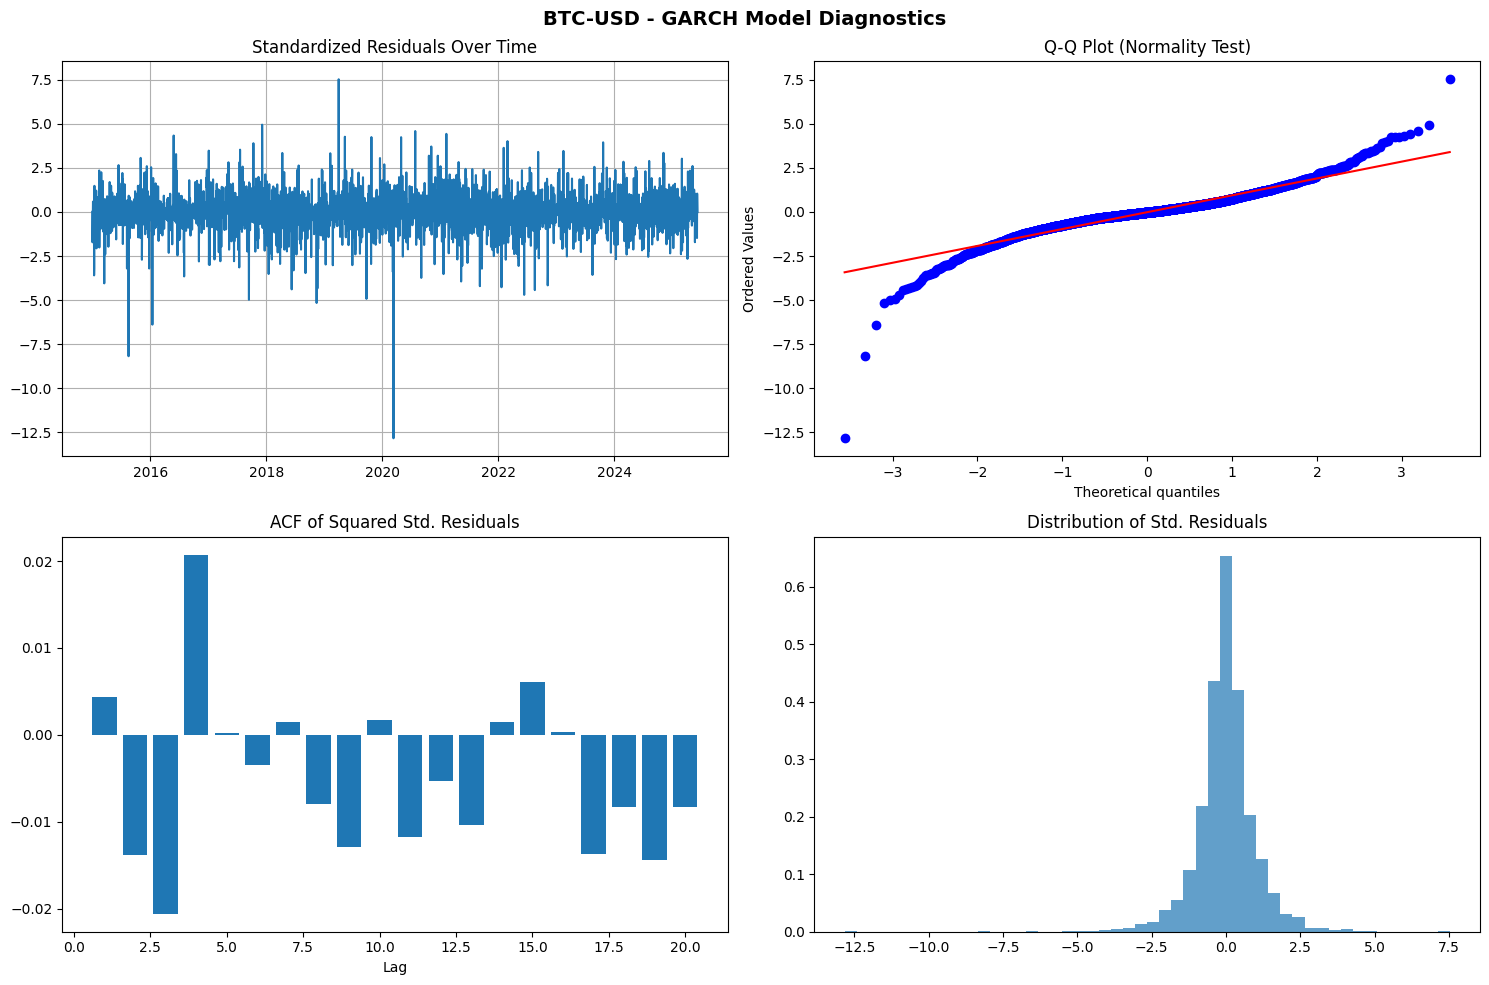


BTC-USD - Ljung-Box Test (p-values < 0.05 indicate remaining autocorrelation):
1    0.786978
2    0.670383
3    0.490466
4    0.398404
5    0.541282
Name: lb_pvalue, dtype: float64

2. MODEL COMPARISON

BTC-USD - Model Comparison:
                         AIC           BIC  Log-Likelihood
GJR-GARCH(1,1)  19915.227063  19946.455297    -9952.613531
EGARCH(1,1)     19919.050126  19944.032714    -9955.525063
GARCH(1,2)      19922.568511  19953.796746    -9956.284256
GARCH(1,1)      19925.330150  19950.312737    -9958.665075
GARCH(2,1)      19927.330149  19958.558384    -9958.665075

3. VOLATILITY FORECASTING


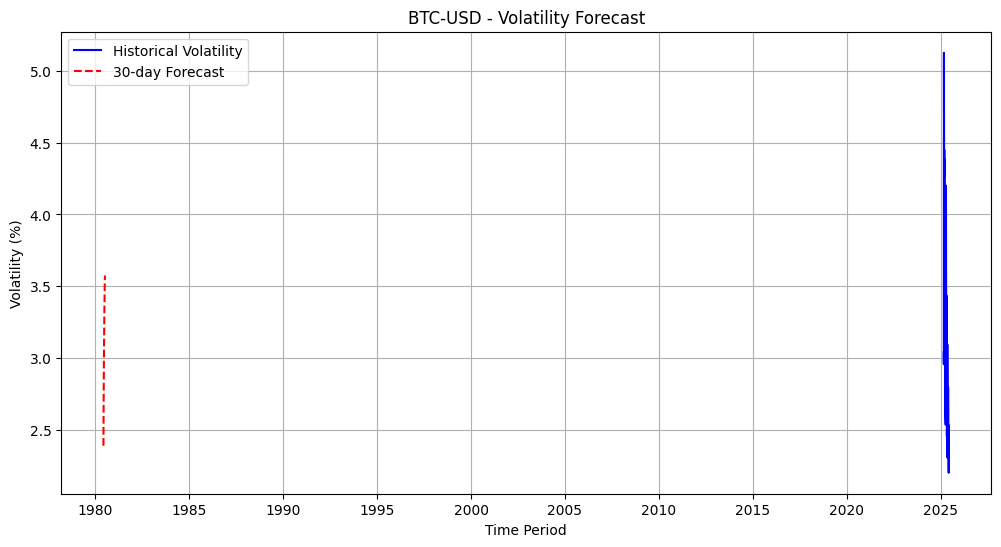


4. RISK METRICS
Analysis failed for BTC-USD: 'module' object is not callable

==================== ADVANCED ANALYSIS FOR GSPC ====================

1. RESIDUAL ANALYSIS


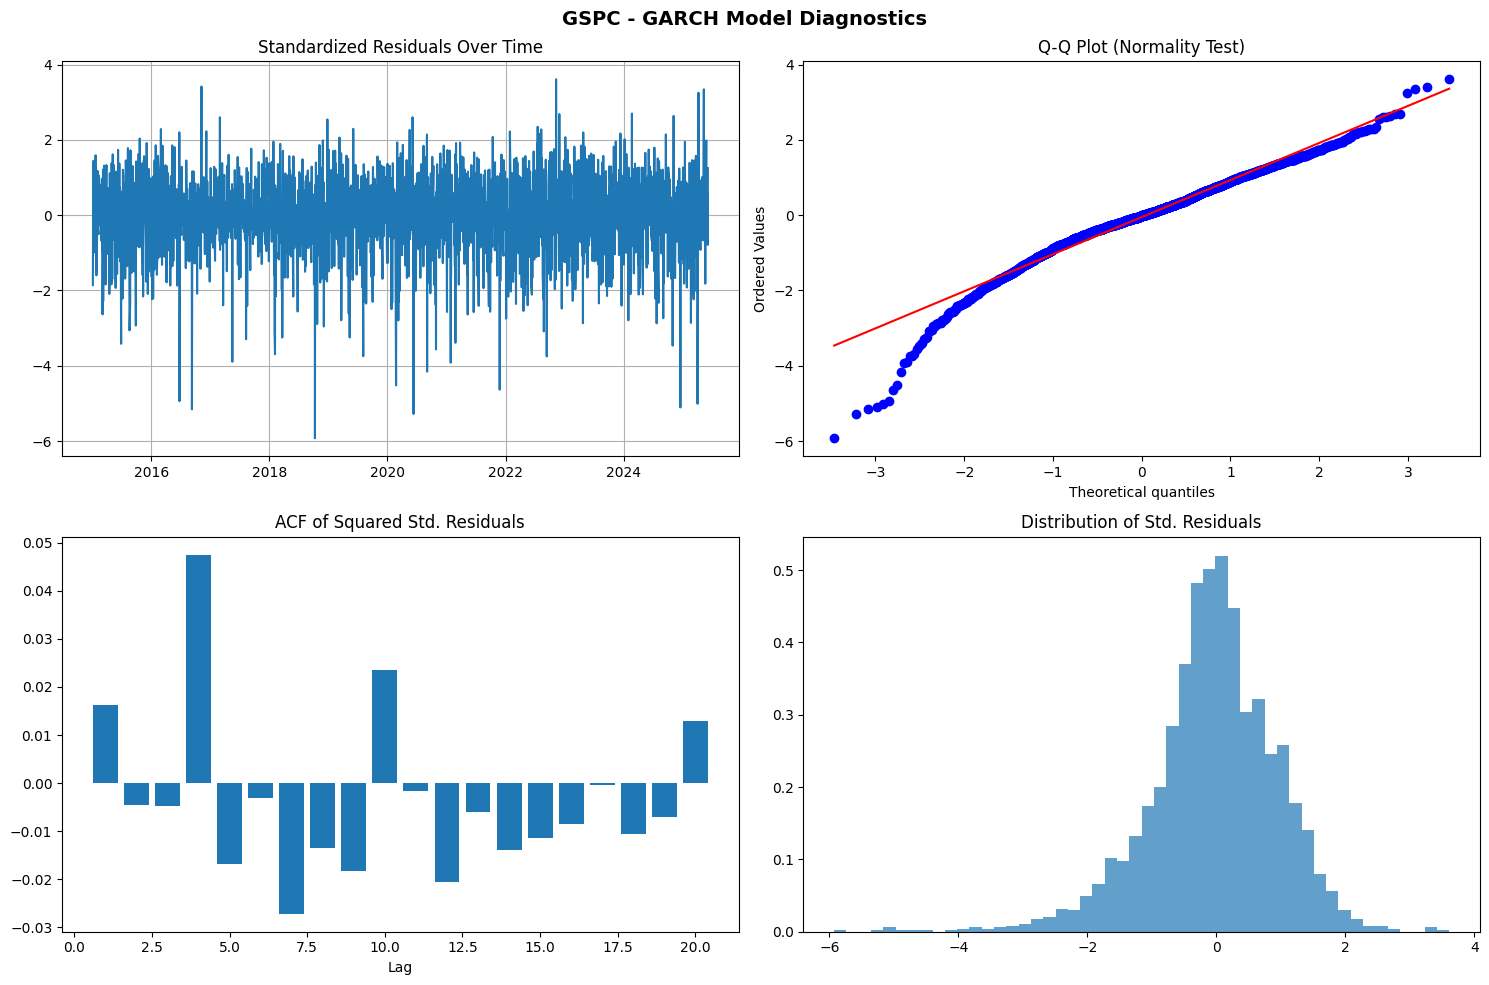


GSPC - Ljung-Box Test (p-values < 0.05 indicate remaining autocorrelation):
1    0.405746
2    0.688774
3    0.848677
4    0.150578
5    0.187474
Name: lb_pvalue, dtype: float64

2. MODEL COMPARISON

GSPC - Model Comparison:
                        AIC          BIC  Log-Likelihood
GJR-GARCH(1,1)  6775.923933  6805.282396    -3382.961966
GARCH(1,1)      6848.630472  6872.117243    -3420.315236
GARCH(1,2)      6850.297094  6879.655557    -3420.148547
GARCH(2,1)      6850.630472  6879.988935    -3420.315236
EGARCH(1,1)     6869.691311  6893.178081    -3430.845655

3. VOLATILITY FORECASTING


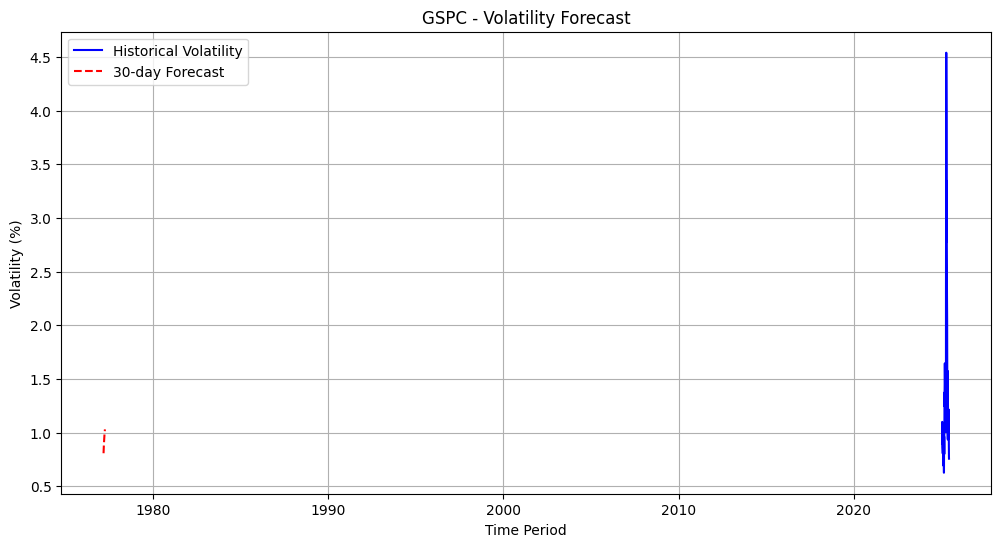


4. RISK METRICS
Analysis failed for GSPC: 'module' object is not callable

==================== ADVANCED ANALYSIS FOR ETH ====================

1. RESIDUAL ANALYSIS


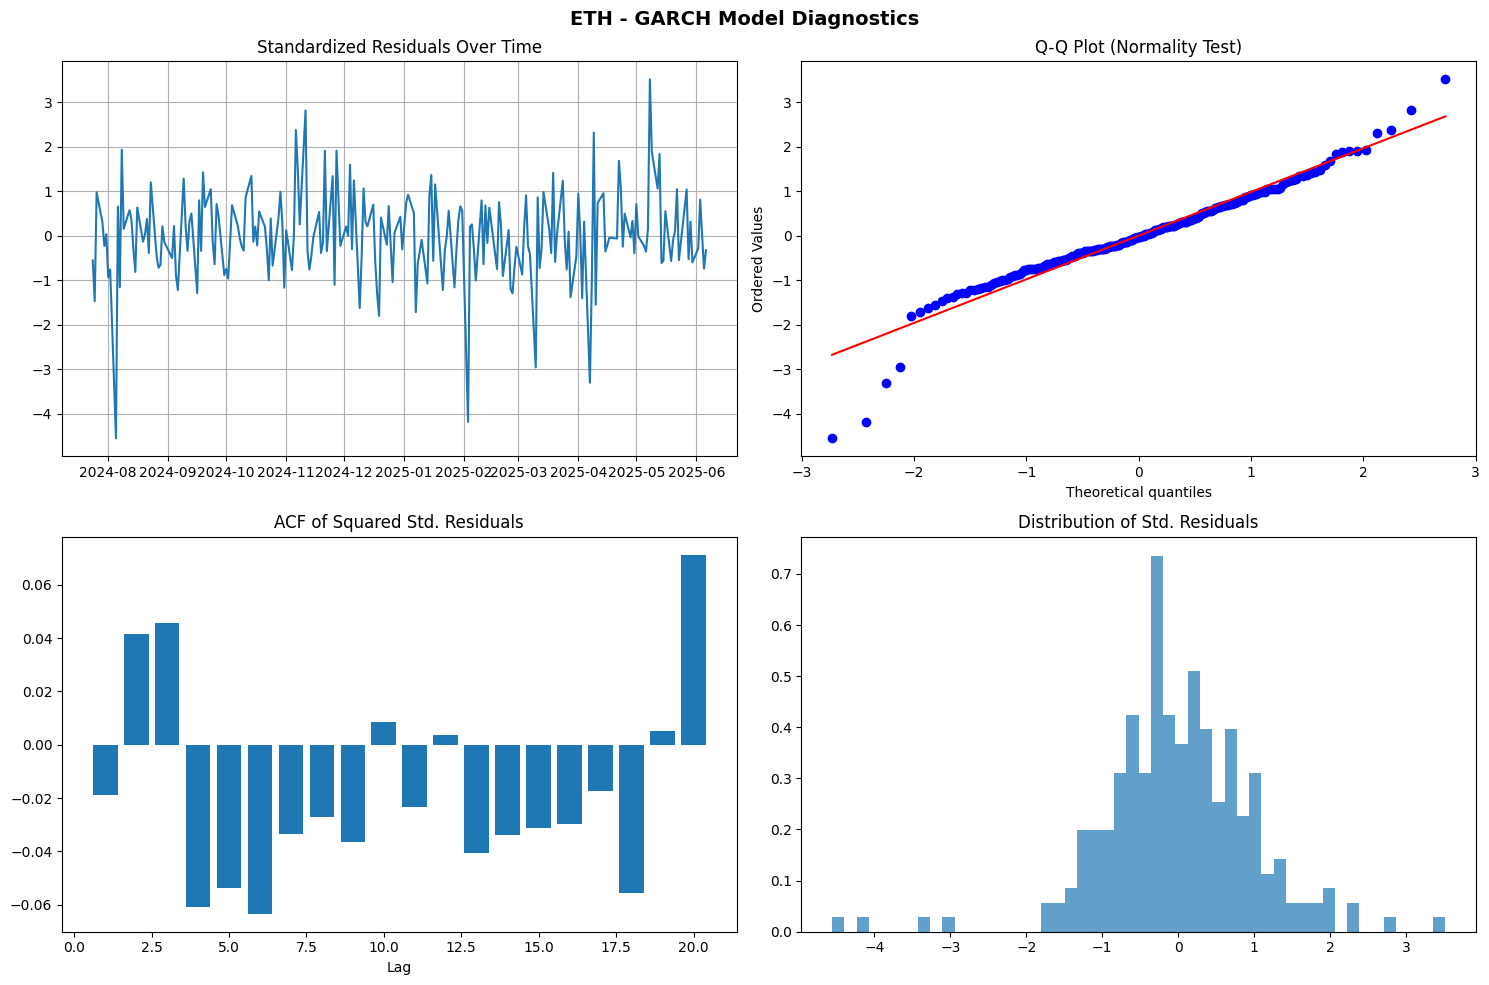


ETH - Ljung-Box Test (p-values < 0.05 indicate remaining autocorrelation):
1    0.776790
2    0.793889
3    0.819450
4    0.779771
5    0.789135
Name: lb_pvalue, dtype: float64

2. MODEL COMPARISON

ETH - Model Comparison:
                        AIC          BIC  Log-Likelihood
EGARCH(1,1)     1312.342945  1325.899232     -652.171473
GARCH(2,1)      1319.869733  1336.815092     -654.934867
GARCH(1,1)      1319.994742  1333.551029     -655.997371
GARCH(1,2)      1320.303168  1337.248527     -655.151584
GJR-GARCH(1,1)  1321.938031  1338.883389     -655.969015

3. VOLATILITY FORECASTING


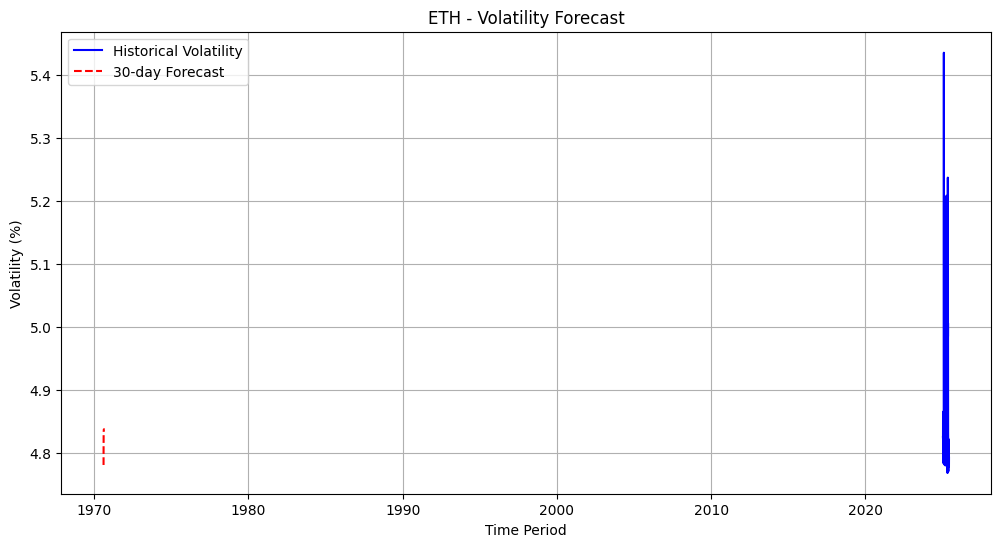


4. RISK METRICS
Analysis failed for ETH: 'module' object is not callable

==================== CROSS-ASSET ANALYSIS ====================


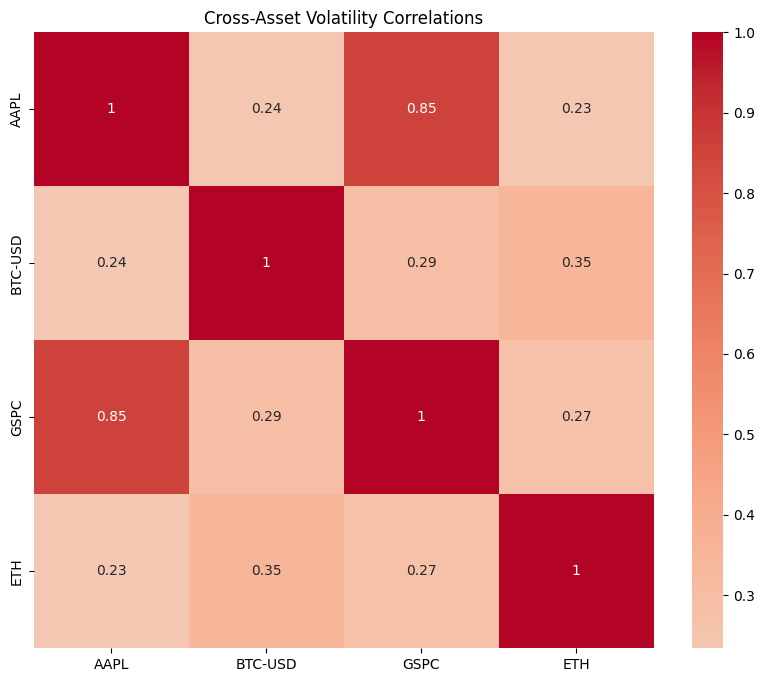


Volatility Correlation Matrix:
             AAPL   BTC-USD      GSPC       ETH
AAPL     1.000000  0.236165  0.850397  0.233957
BTC-USD  0.236165  1.000000  0.292549  0.349707
GSPC     0.850397  0.292549  1.000000  0.270697
ETH      0.233957  0.349707  0.270697  1.000000

Advanced GARCH Analysis Complete!


In [4]:
# MAIN EXECUTION CODE
print("Starting Advanced GARCH Analysis...")

# Initialize storage
all_results = {}
all_returns = {}

for name, df in assets.items():
    print(f"\n{'='*20} ADVANCED ANALYSIS FOR {name} {'='*20}")
    
    try:
        df = df.dropna()
        returns = df['log_return'] * 100
        
        # Fit GARCH model
        model = arch_model(returns, vol='GARCH', p=1, q=1)
        results = model.fit(disp='off')
        
        # Store for cross-asset analysis
        all_results[name] = results
        all_returns[name] = returns
        
        # 1. Residual Analysis
        print("\n1. RESIDUAL ANALYSIS")
        analyze_residuals(results, name)
        
        # 2. Model Comparison
        print("\n2. MODEL COMPARISON")
        compare_garch_models(returns, name)
        
        # 3. Volatility Forecasting
        print("\n3. VOLATILITY FORECASTING")
        forecasts = forecast_volatility(results, name)
        
        # 4. Risk Metrics
        print("\n4. RISK METRICS")
        risk_metrics = calculate_risk_metrics(results, returns, name)
        
        # 5. Regime Analysis
        print("\n5. REGIME ANALYSIS")
        regime_stats = volatility_regime_analysis(results.conditional_volatility, name)
        
    except Exception as e:
        print(f"Analysis failed for {name}: {e}")
        continue

# 6. Cross-Asset Analysis
print(f"\n{'='*20} CROSS-ASSET ANALYSIS {'='*20}")
if all_results:
    cross_correlation = cross_asset_volatility_analysis(all_results)
else:
    print("No results available for cross-asset analysis")

print("\nAdvanced GARCH Analysis Complete!")